<h1>Brest Cancer Case Study using Logistic Regression</h1>

## 1) Importing Libraries

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix

## 2) Importing Dataset

In [6]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [7]:
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [9]:
print(X.shape)

(683, 9)


In [8]:
print(y)

[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2
 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 2 4 2 4 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 

In [10]:
print(y.shape)

(683,)


<AxesSubplot:>

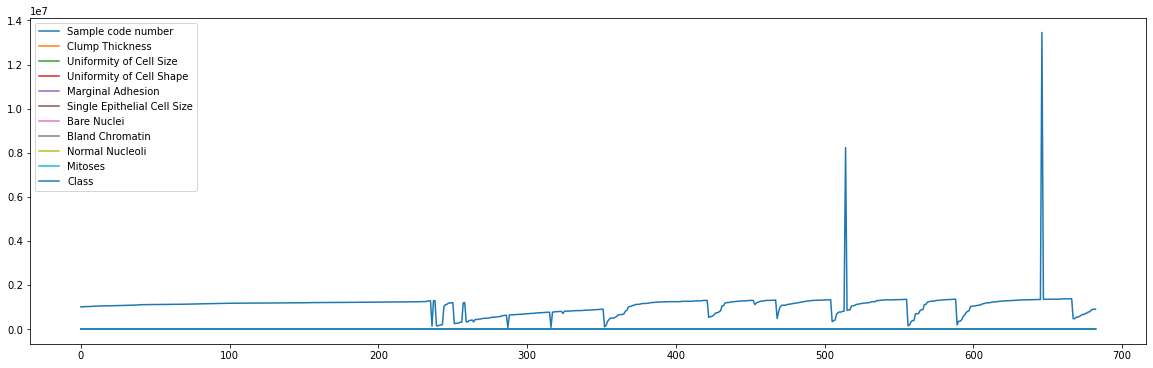

In [15]:
dataset.plot(figsize=(20,6))

## 3) Splitting the Dataset

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
print(X_train)

[[10  1  1 ...  5  4  1]
 [ 1  1  1 ...  3  1  1]
 [ 5  1  1 ...  3  1  1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [10  9  7 ...  7  7  1]]


In [20]:
print(X_test)

[[ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [ 5  5  5 ...  4  3  1]
 ...
 [ 4  1  1 ...  1  1  1]
 [ 4 10  4 ...  9 10  1]
 [ 2  1  1 ...  2  1  1]]


In [21]:
print(y_train)

[4 2 2 2 4 2 2 2 2 4 2 4 2 4 4 2 2 2 2 4 4 2 4 4 4 4 4 4 2 2 2 2 2 2 4 4 4
 2 2 2 4 2 2 4 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 2 2
 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2 2 4 2 4 2 4 2 2 2 2 2 4 2 2 4
 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 4 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 4 2 4 2 2 4 2 2 2 2 2 2 2
 4 4 4 4 2 4 2 4 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2
 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 4 4 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2
 2 2 4 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 2 4 2 2 4 2 2 2
 2 4 4 2 2 2 2 4 2 2 4 2 2 2 2 4 4 2 4 2 4 2 2 2 4 4 4 2 2 2 2 2 2 2 2 4 4
 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 2 2 2 4
 2 2 2 4 2 2 4 4 4 2 4 4 4 2 2 2 4 2 4 2 2 4 2 4 4 4 2 2 2 4 2 4 4 4 2 2 2
 4 2 4 2 2 2 2 4 4 2 2 2 4 4 2 2 4 2 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 2
 2 2 4 4 2 2 4 4 2 2 4 4 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2 2 4 2 4
 2 4 2 2 4 2 2 2 2 4 2 2 

In [22]:
print(y_test)

[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 2 4 2 4 2 4 4 4 2 4 4 4 2 2 2 4 4 2 2 4 4 2 2 4
 2 2 4 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2]


## 4) Training the model

In [26]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## 5) Predicting the results

In [27]:
y_pred = model.predict(X_test)

In [45]:
comparision = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))
comparision.rename(columns={0:'Actual_Values',1:'Predicted_Values'})

,Actual_Values,Predicted_Values
0,2,2
1,2,2
2,4,4
3,4,4
4,2,2
...,...,...
132,4,4
133,2,2
134,2,2
135,4,4


## 6) Confusion Matrix

In [47]:
confusion_matrix(y_test,y_pred)

array([[84,  3],
       [ 3, 47]])

## 7) Evaluating the model with accuracy and k-fold validation

In [54]:
accuracy = cross_val_score(estimator=model,X = X_train, y = y_train, cv = 10)
print("Accuracy : {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracy.std()*100))

Accuracy : 96.70 %
Standard Deviation : 1.98 %
